In [1]:
#TASK(a):
# installing packages
library("tidyverse")
library("dplyr")
library("skimr")
library("stringr")
library("rvest")
library("purrr")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




In [3]:
# Scrape the web page turners.co.nz for the cars data that are on sale
url_cars <- "https://www.turners.co.nz/Cars/Used-Cars-for-Sale/?sortorder=7&pagesize=24&pageno=1"
page_title <- read_html(url_cars)
car_name <- page_title %>% html_nodes(".search-header") %>% html_text()
location <- page_title %>% html_nodes(".location .value") %>% html_text()
price <- page_title %>% html_nodes(".buyNowDiscountPrice") %>% html_text()
finance <- page_title %>% html_nodes(".finance span") %>% html_text()
odometer <- page_title %>% html_nodes(".odometer span") %>% html_text()
Cars <- data.frame(car_name, location, price, finance, odometer, stringsAsFactors = FALSE)
head(Cars)

,car_name,location,price,finance,odometer
,<chr>,<chr>,<chr>,<chr>,<chr>
1,2013 Toyota Prius,Christchurch City,"$13,900 Plus ORC",$81 per week,"59,043"
2,2013 Toyota Prius L,Christchurch City,"$12,140 Plus ORC",$72 per week,"89,116"
3,2010 Volkswagen Polo,Otahuhu,"$9,450 Plus ORC",$57 per week,"55,214"
4,2008 Toyota Crown,Penrose - Great South Road,"$11,890 Plus ORC",$70 per week,"37,067"
5,2015 Subaru Levorg 4WD,Panmure,"$15,480",$87 per week,"154,783"
6,2016 Holden Commodore VF2 Evoke,Avalon Drive,"$14,890",$84 per week,"181,340"


In [104]:
#TASK(b):
# Pre-Process the data and separate into meaningful columns
Final_Data <- Cars %>% separate(car_name, c("Year", "Make", "Model"), " ") %>%
         separate(price, c("Price", "extra", "extra1"), " ") %>% 
         separate(finance, c("Finance_per_week", "extra2", "extra3"), " ") %>%
         select(Year, Make, Model, location, Price, Finance_per_week, odometer) %>%
         as.data.frame()
         
        
Final_Data

Warning message:
"Expected 3 pieces. Additional pieces discarded in 13 rows [2, 5, 6, 8, 11, 12, 13, 15, 18, 19, 20, 21, 22]."
Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 6 rows [5, 6, 7, 12, 15, 20]."


Year,Make,Model,location,Price,Finance_per_week,odometer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2013,Toyota,Prius,Christchurch City,"$13,900",$81,"59,043"
2013,Toyota,Prius,Christchurch City,"$12,140",$72,"89,116"
2010,Volkswagen,Polo,Otahuhu,"$9,450",$57,"55,214"
2008,Toyota,Crown,Penrose - Great South Road,"$11,890",$70,"37,067"
2015,Subaru,Levorg,Panmure,"$15,480",$87,"154,783"
2016,Holden,Commodore,Avalon Drive,"$14,890",$84,"181,340"
2011,Volvo,S60,Penrose - Great South Road,"$14,800",$83,"79,044"
2006,Mitsubishi,Outlander,Manukau,"$12,440",$73,"90,498"
2008,Subaru,Forester,Panmure,"$10,950",$65,"114,460"


In [105]:
#Take a look on the data types and watch out for any NA values
summary(Final_Data)

     Year               Make              Model             location        
 Length:24          Length:24          Length:24          Length:24         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    Price           Finance_per_week     odometer        
 Length:24          Length:24          Length:24         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

In [106]:
#TASK(c):
# Scrape the whole website (i.e., Get all the cars data that are on sale on turners.co.nz)
url<- "https://www.turners.co.nz/Cars/Used-Cars-for-Sale/?sortorder=7&pagesize=24&pageno=%d"

map_df(1:124, function(i) {
    page_title <- read_html(sprintf(url,i))
    car_name <- page_title %>% html_nodes(".search-header") %>% html_text()
    location <- page_title %>% html_nodes(".location .value") %>% html_text()
    price <- page_title %>% html_nodes(".buyNowDiscountPrice") %>% html_text()
    finance <- page_title %>% html_nodes(".finance span") %>% html_text()
    odometer <- page_title %>% html_nodes(".odometer span") %>% html_text()
    Cars <- data.frame(car_name, location, price, finance, odometer, stringsAsFactors = FALSE)
    
}) -> CarsData


In [107]:
# Take a glimpse on the data (Data is placed into a total of 2976 rows and 5 columns)
glimpse(CarsData)
head(CarsData)

Rows: 2,976
Columns: 5
$ car_name <chr> "2013 Toyota Prius", "2013 Toyota Prius L", "2010 Volkswagen ~
$ location <chr> "Christchurch City", "Christchurch City", "Otahuhu", "Penrose~
$ price    <chr> "$13,900 Plus ORC", "$12,140 Plus ORC", "$9,450 Plus ORC", "$~
$ finance  <chr> "$81 per week", "$72 per week", "$57 per week", "$70 per week~
$ odometer <chr> "\r\n                            59,043\r\n                  ~


,car_name,location,price,finance,odometer
,<chr>,<chr>,<chr>,<chr>,<chr>
1,2013 Toyota Prius,Christchurch City,"$13,900 Plus ORC",$81 per week,"59,043"
2,2013 Toyota Prius L,Christchurch City,"$12,140 Plus ORC",$72 per week,"89,116"
3,2010 Volkswagen Polo,Otahuhu,"$9,450 Plus ORC",$57 per week,"55,214"
4,2008 Toyota Crown,Penrose - Great South Road,"$11,890 Plus ORC",$70 per week,"37,067"
5,2015 Subaru Levorg 4WD,Panmure,"$15,480",$87 per week,"154,783"
6,2016 Holden Commodore VF2 Evoke,Avalon Drive,"$14,890",$84 per week,"181,340"


In [110]:
#Preprocess the data and divide into meaningful columns (more columns have been created here using the existing data)
Final_CarsData <- CarsData %>% separate(car_name, c("Year", "Make", "Model"), " ") %>%
         separate(price, c("Price", "extra", "extra1"), " ") %>% 
         separate(finance, c("Finance_per_week", "extra2", "extra3"), " ") %>%
         select(Year, Make, Model, location, Price, Finance_per_week, odometer) %>%
         as.data.frame()

head(Final_CarsData)

Warning message:
"Expected 3 pieces. Additional pieces discarded in 1612 rows [2, 5, 6, 8, 11, 12, 13, 15, 18, 19, 20, 21, 22, 26, 29, 30, 32, 35, 36, 37, ...]."
Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 744 rows [5, 6, 7, 12, 15, 20, 29, 30, 31, 36, 39, 44, 53, 54, 55, 60, 63, 68, 77, 78, ...]."


,Year,Make,Model,location,Price,Finance_per_week,odometer
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2013,Toyota,Prius,Christchurch City,"$13,900",$81,"59,043"
2,2013,Toyota,Prius,Christchurch City,"$12,140",$72,"89,116"
3,2010,Volkswagen,Polo,Otahuhu,"$9,450",$57,"55,214"
4,2008,Toyota,Crown,Penrose - Great South Road,"$11,890",$70,"37,067"
5,2015,Subaru,Levorg,Panmure,"$15,480",$87,"154,783"
6,2016,Holden,Commodore,Avalon Drive,"$14,890",$84,"181,340"


In [114]:
#Rename columns Year and Odometer as well as mutate the location column to change some of the column values
TurnerCars <- Final_CarsData %>%
              mutate(location = replace(location, location == "Penrose - Great South Road" , "Penrose")) %>%
              rename(Odometer_in_km = odometer) %>%
              rename(Model_Year = Year)

head(TurnerCars)
count(TurnerCars)

,Model_Year,Make,Model,location,Price,Finance_per_week,Odometer_in_km
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2013,Toyota,Prius,Christchurch City,"$13,900",$81,"59,043"
2,2013,Toyota,Prius,Christchurch City,"$12,140",$72,"89,116"
3,2010,Volkswagen,Polo,Otahuhu,"$9,450",$57,"55,214"
4,2008,Toyota,Crown,Penrose,"$11,890",$70,"37,067"
5,2015,Subaru,Levorg,Panmure,"$15,480",$87,"154,783"
6,2016,Holden,Commodore,Avalon Drive,"$14,890",$84,"181,340"


n
<int>
2976


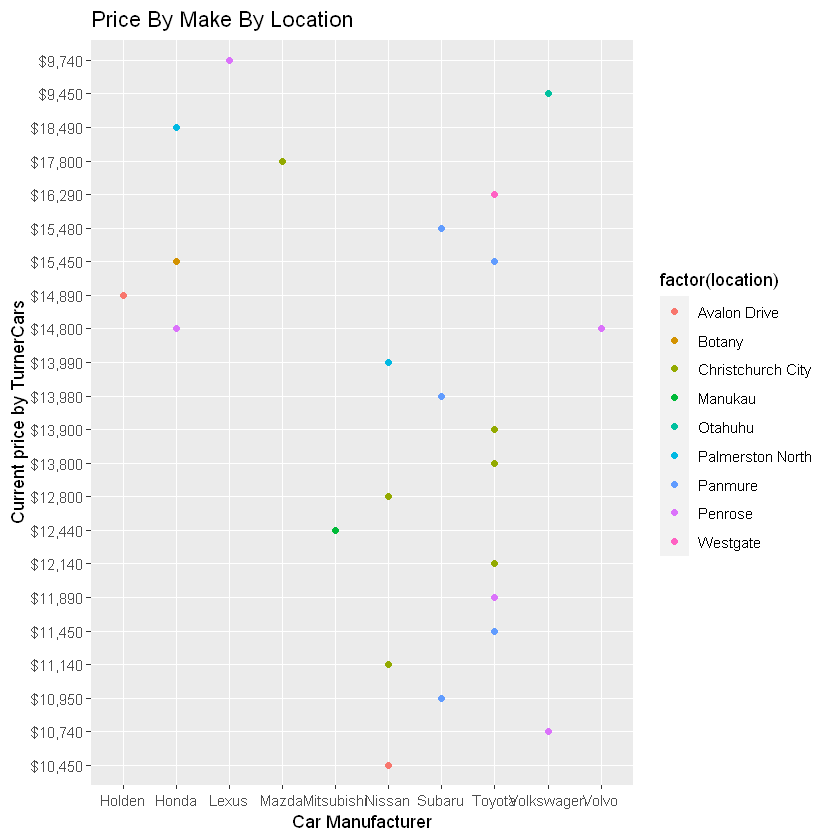

In [122]:
#TASK(d):
# ggplot shows the car prices for different models  by different locations 
Cars_Plot <- TurnerCars %>% ggplot(
                   mapping = aes(x = Make, y = Price, color = factor(location))) +
                  # facet_wrap(~location) +
                   xlab("Car Manufacturer") + 
                   ylab("Current price by TurnerCars") +
                   ggtitle("Price By Make By Location")+
                   geom_point()
Cars_Plot